<a href="https://colab.research.google.com/github/minurijaya/ML-Assignments/blob/main/Question_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import reqired libraries
from sklearn import linear_model
from sklearn import datasets
from sklearn import preprocessing
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
from scipy.stats import entropy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load datasets

In [ ]:
# Load the datasets

#2015 dataset
file_path_2015 = "drive/MyDrive/Colab Notebooks/2015.csv"
raw_df_2015 = pd.read_csv(file_path_2015)

#2019 dataset
file_path_2019 = "drive/MyDrive/Colab Notebooks/2019.csv"
raw_df_2019 = pd.read_csv(file_path_2019)



## Exploratory Data Analysis (EDA)

2015 - first few records:        Country                     Region  Overall rank  Score  \
0  Switzerland             Western Europe             1  7.587   
1      Iceland             Western Europe             2  7.561   
2      Denmark             Western Europe             3  7.527   
3       Norway             Western Europe             4  7.522   
4       Canada              North America             5  7.427   
5      Finland             Western Europe             6  7.406   
6  Netherlands             Western Europe             7  7.378   
7       Sweden             Western Europe             8  7.364   
8  New Zealand  Australia and New Zealand             9  7.286   
9    Australia  Australia and New Zealand            10  7.284   

   Standard Error  GDP per capita  Social support  Healthy life expectancy  \
0         0.03411         1.39651         1.34951                  0.94143   
1         0.04884         1.30232         1.40223                  0.94784   
2         0.0

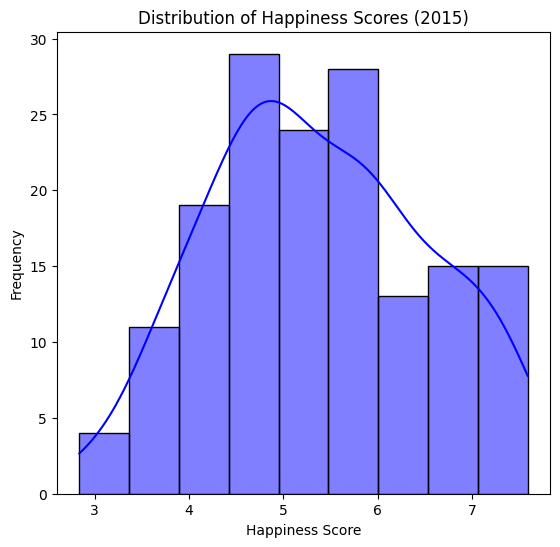

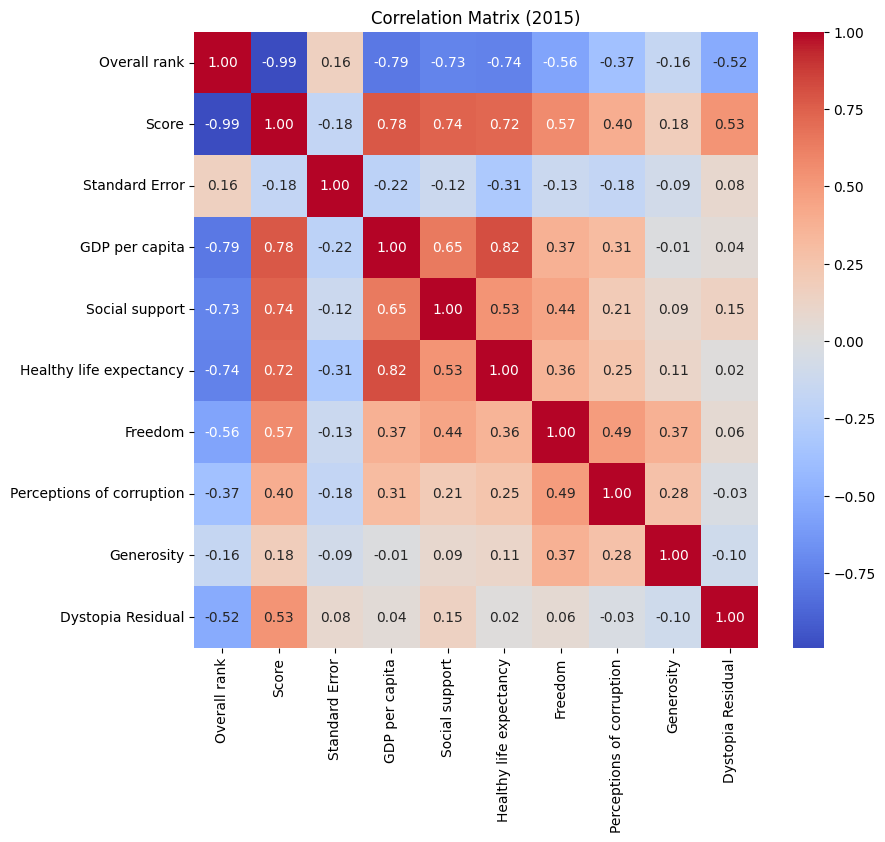

<Figure size 2000x1600 with 0 Axes>

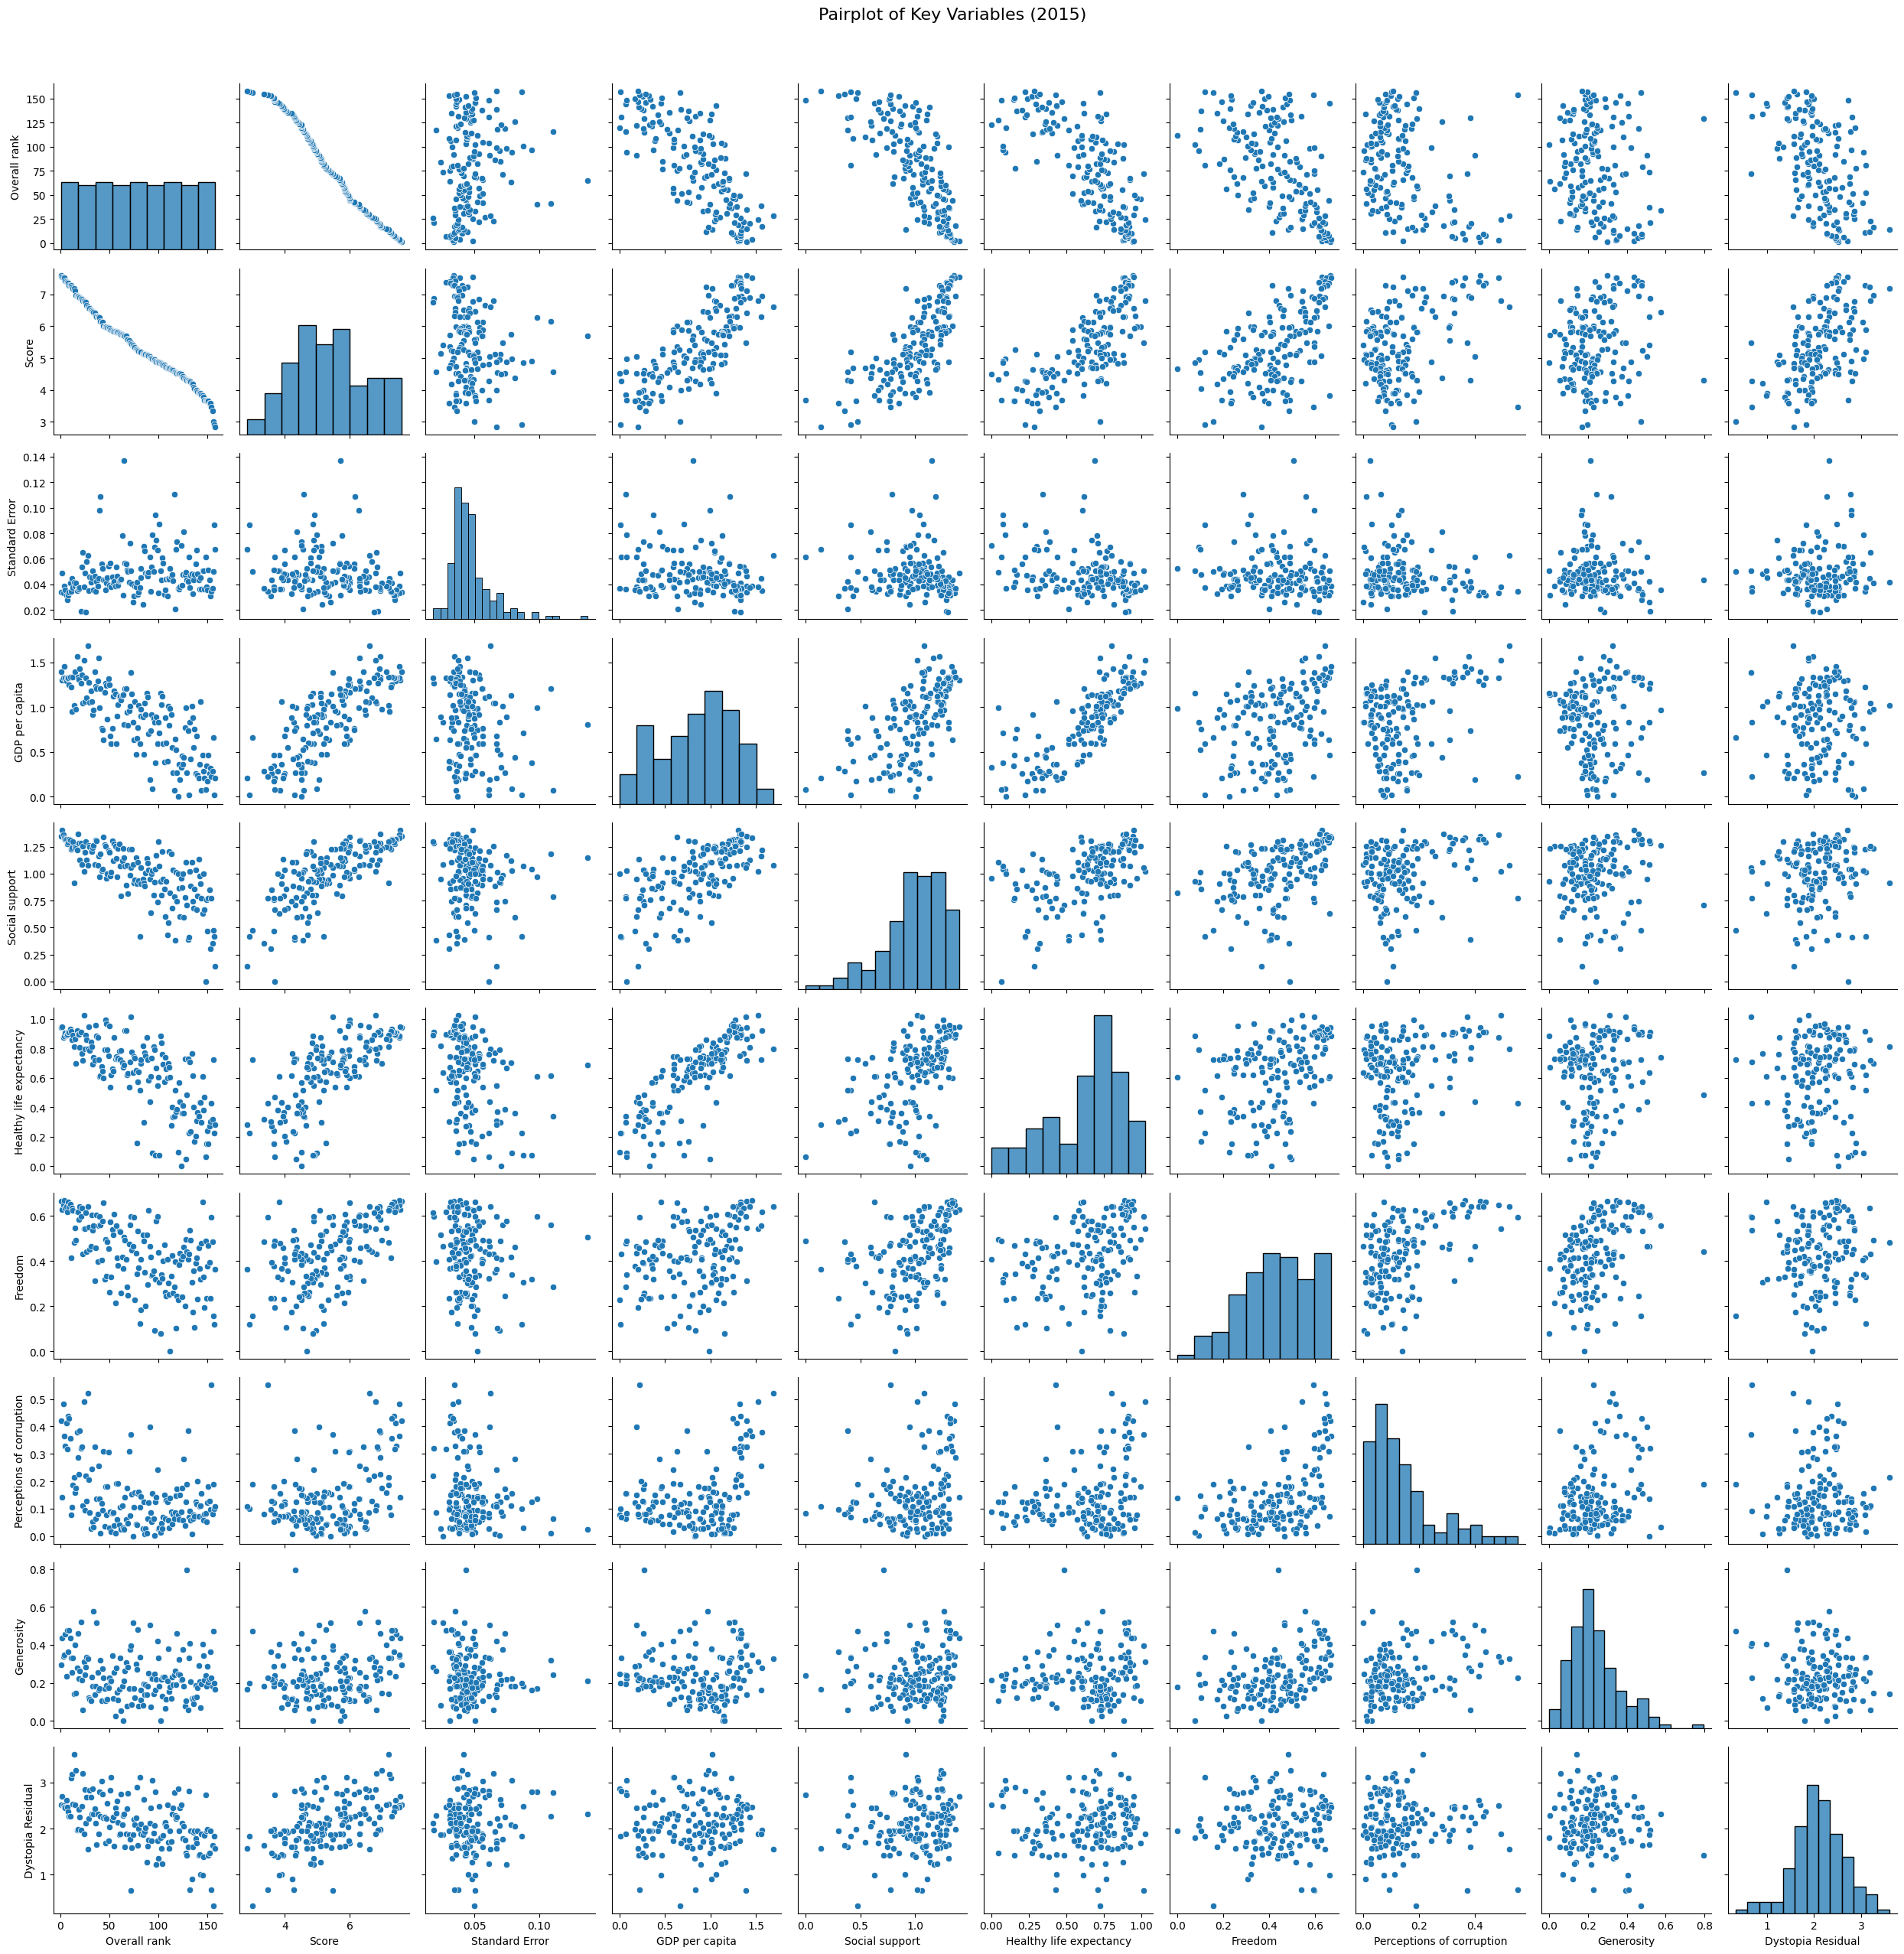

In [ ]:
#Exploratory Data Analysis (EDA) -2015

#2015 dataset

#Display first few records of the datasets
print("2015 - first few records:",raw_df_2015.head(10))

#data shape
print("\n2015 - Data Shape:", raw_df_2015.shape)

#print column names
print("\nColumns in 2015 dataset:", raw_df_2015.columns.tolist())

# Rename columns
#for consitency of the column names in th data sets
raw_df_2015 = raw_df_2015.rename(columns={
    'Country': 'Country',
    'Region': 'Region',
    'Happiness Rank': 'Overall rank',
    'Happiness Score': 'Score',
    'Economy (GDP per Capita)': 'GDP per capita',
    'Family': 'Social support',
    'Health (Life Expectancy)': 'Healthy life expectancy',
    'Freedom': 'Freedom',
    'Trust (Government Corruption)': 'Perceptions of corruption',
    'Generosity': 'Generosity',
    'Dystopia Residual': 'Dystopia Residual'
})


#print column names
print("\nColumns in 2015 dataset:", raw_df_2015.columns.tolist())

# Basic info
print("\n2015 - Data Info:",raw_df_2015.info())
print("\n2015 - Summary statistics:",raw_df_2015.describe())

# Check missing values
print(raw_df_2015.isnull().sum())

#Distribution of happiness scores
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(raw_df_2015['Score'], kde=True, color='blue')
plt.title('Distribution of Happiness Scores (2015)')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')

# Correlation heatmap for numerical columns for correlation
numerical_cols_2015 = raw_df_2015.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
sns.heatmap(raw_df_2015[numerical_cols_2015].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (2015)')

#Pairplot to visualize relationships between variables
# features_2015 = ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
#                 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

plt.figure(figsize=(20, 16))
sns.pairplot(raw_df_2015[numerical_cols_2015], height=2.5)
plt.suptitle('Pairplot of Key Variables (2015)', y=1.02, fontsize=16)
plt.tight_layout()
plt.savefig('pairplot_2015.png')
plt.show()



2019 - first few records:    Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   
5             6       Switzerland  7.480           1.452           1.526   
6             7            Sweden  7.343           1.387           1.487   
7             8       New Zealand  7.307           1.303           1.557   
8             9            Canada  7.278           1.365           1.505   
9            10           Austria  7.246           1.376           1.475   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.

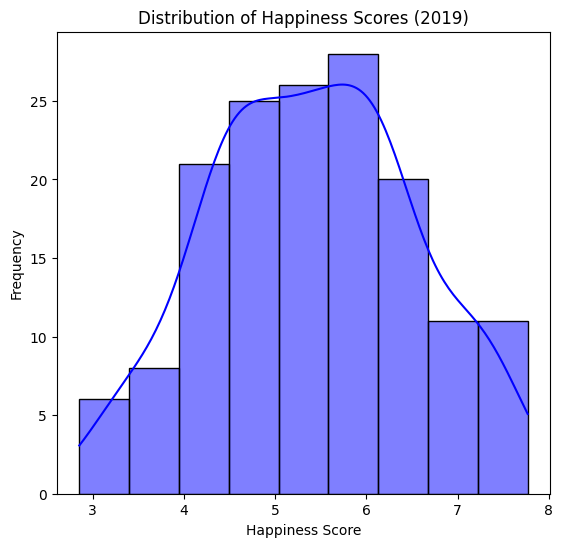

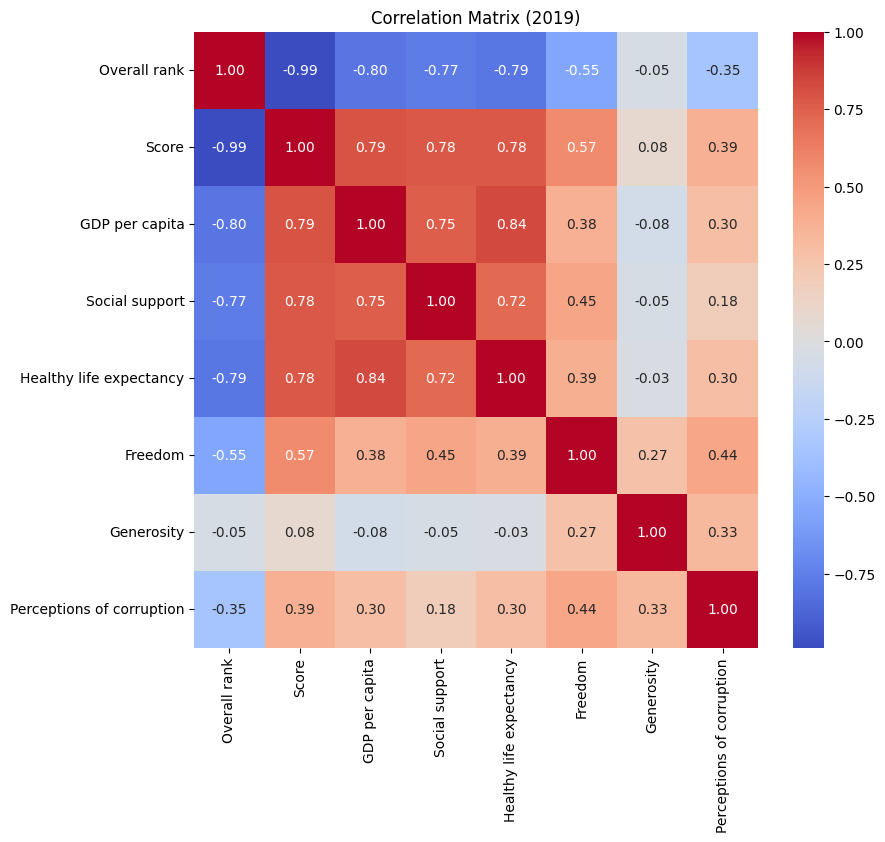

<Figure size 2000x1600 with 0 Axes>

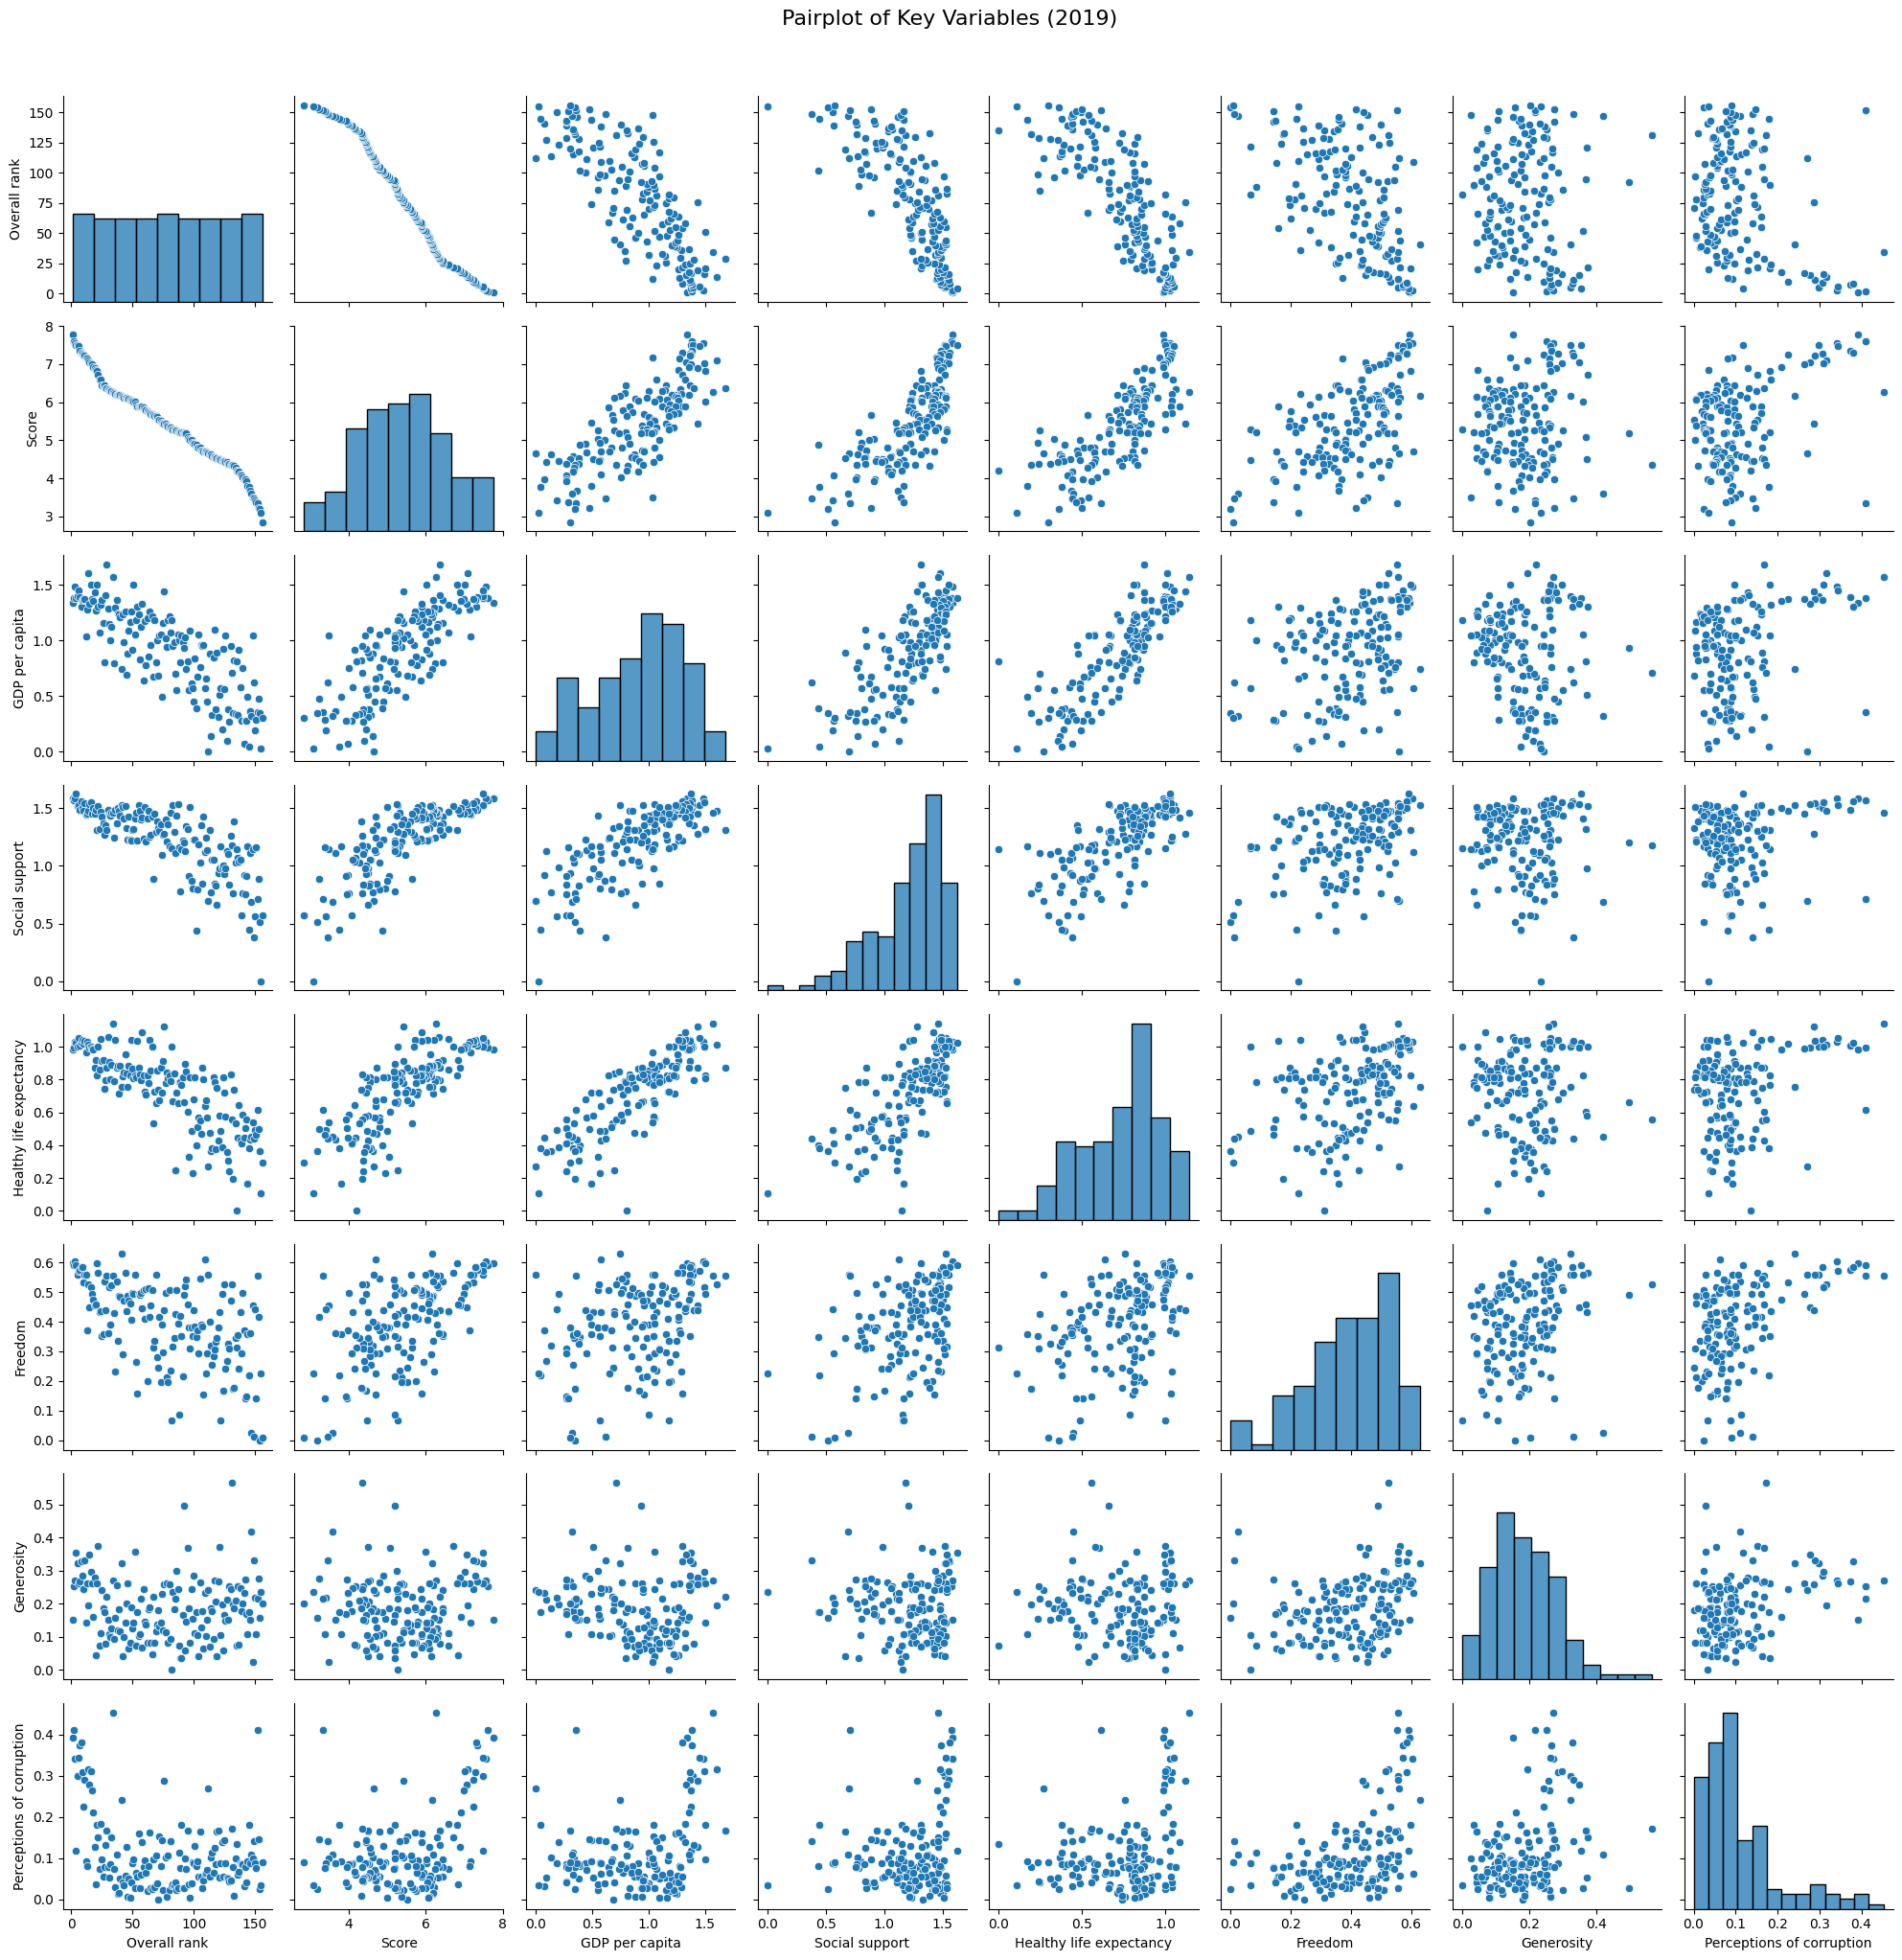

In [ ]:
#Exploratory Data Analysis (EDA) -2019

#2019 dataset

#Display first few records of the datasets
print("2019 - first few records:",raw_df_2019.head(10))

#data shape
print("\n2019 - Data Shape:", raw_df_2019.shape)

#print column names
print("\nColumns in 2019 dataset:", raw_df_2019.columns.tolist())

# Rename columns
#for consitency of the column names in th data sets
raw_df_2019 = raw_df_2019.rename(columns={
    'Country or region': 'Country',
    'Score': 'Score',
    'GDP per capita': 'GDP per capita',
    'Social support': 'Social support',
    'Healthy life expectancy': 'Healthy life expectancy',
    'Freedom to make life choices': 'Freedom',
    'Generosity': 'Generosity',
    'Perceptions of corruption': 'Perceptions of corruption',
})


# Basic info
print("\n2019 - Data Info:",raw_df_2019.info())
print("\n2019 - Summary statistics:",raw_df_2019.describe())

# Check missing values
print(raw_df_2019.isnull().sum())

#Distribution of happiness scores
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(raw_df_2019['Score'], kde=True, color='blue')
plt.title('Distribution of Happiness Scores (2019)')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')

# Correlation heatmap for numerical columns for correlation
numerical_cols_2019 = raw_df_2019.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
sns.heatmap(raw_df_2019[numerical_cols_2019].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (2019)')

#Pairplot to visualize relationships between variables
# features_2015 = ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
#                 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

plt.figure(figsize=(20, 16))
sns.pairplot(raw_df_2019[numerical_cols_2019], height=2.5)
plt.suptitle('Pairplot of Key Variables (2019)', y=1.02, fontsize=16)
plt.tight_layout()
#plt.savefig('pairplot_2015.png')
plt.show()

## Outlier Detection and Removal

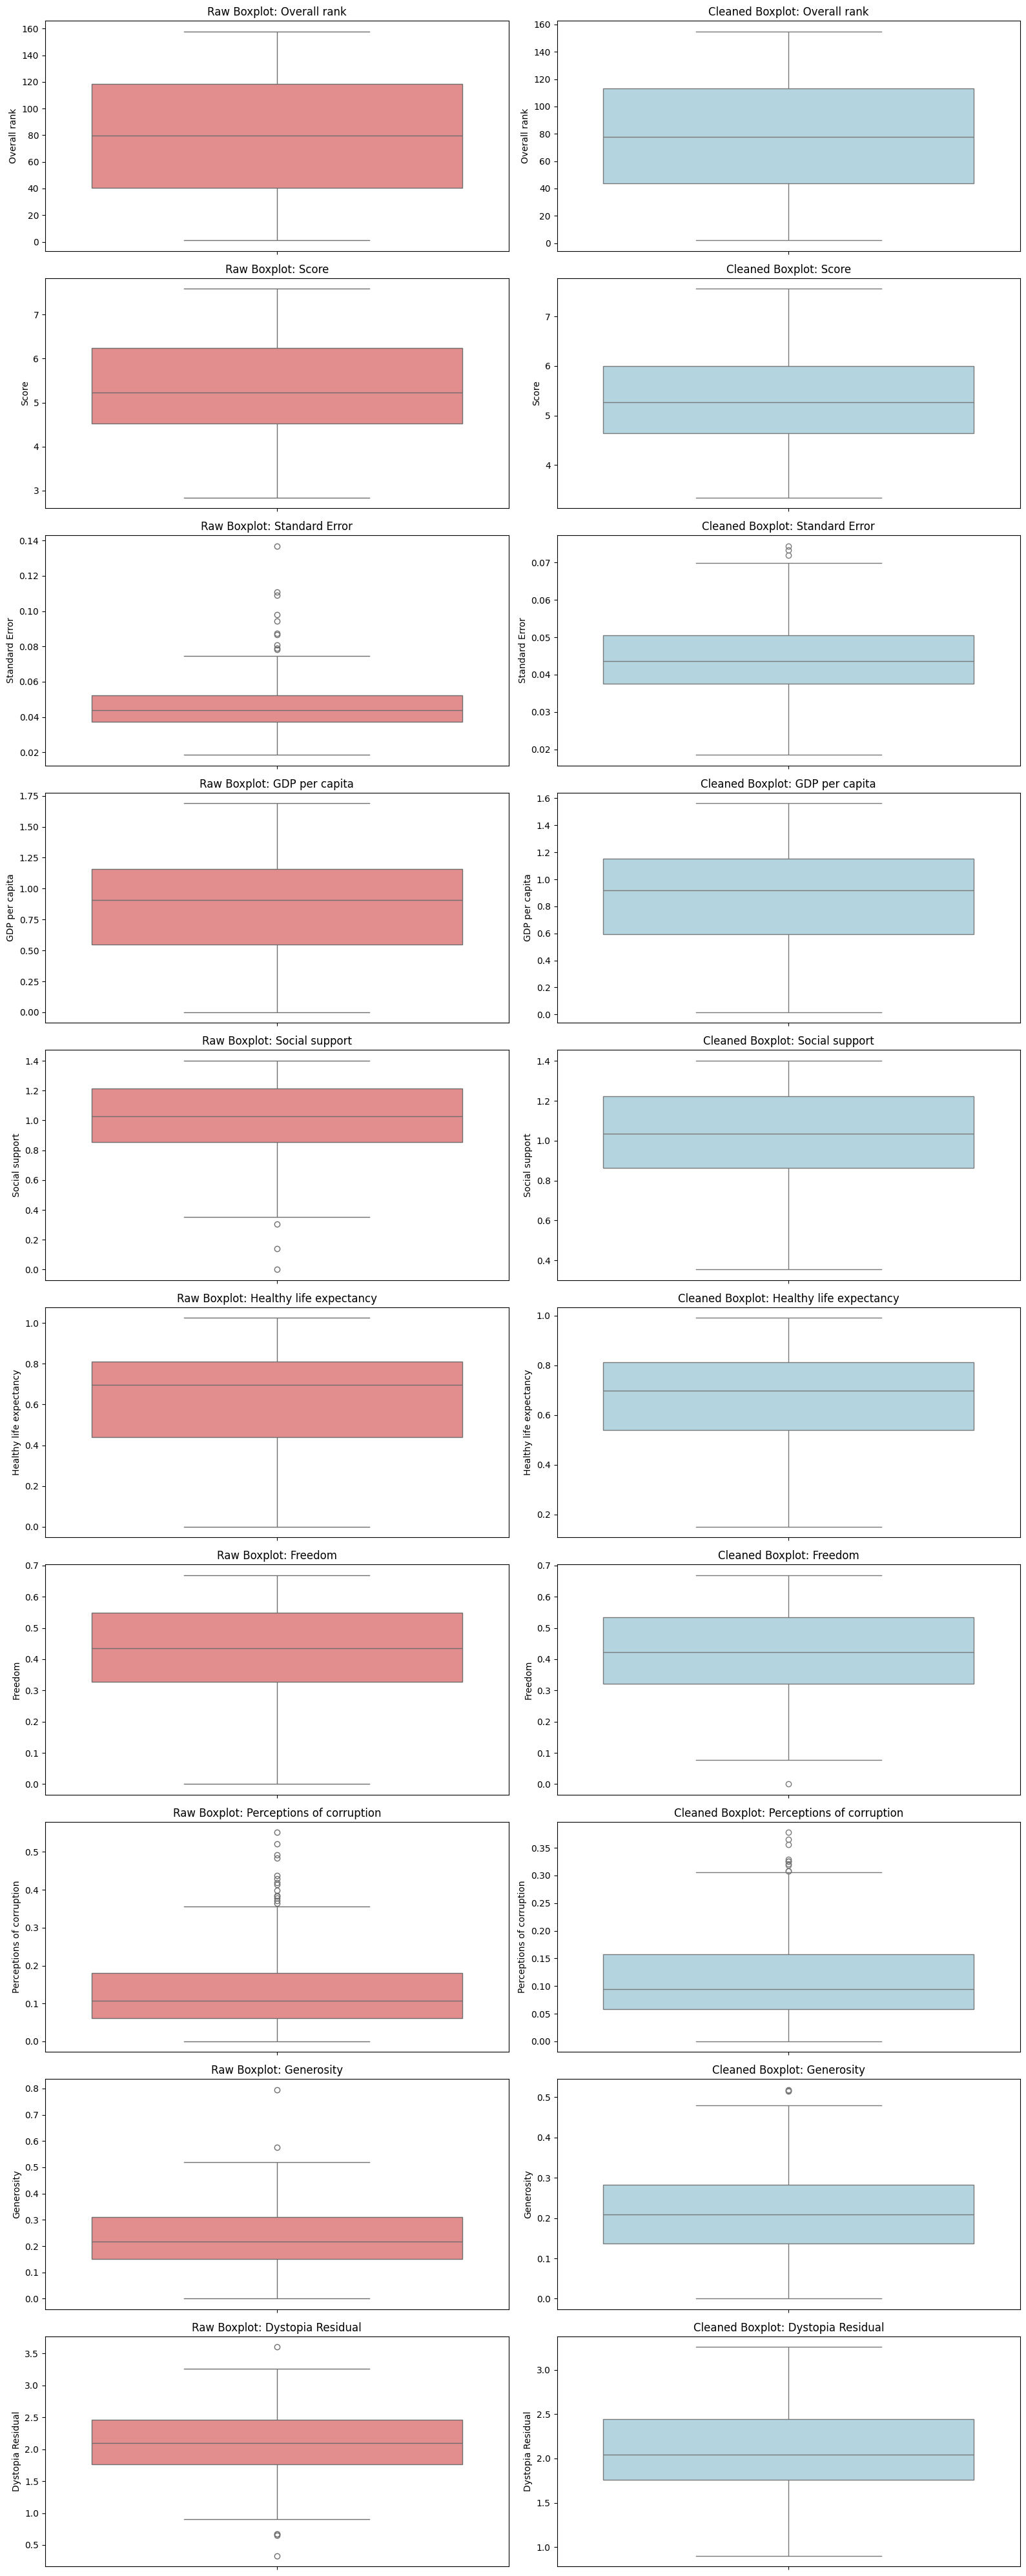

In [ ]:
#Outlier Detection and Removal 2015



# numerical_cols_2015 = ['Happiness Rank','Happiness Score', 'Standard Error','Economy (GDP per Capita)', 'Family',
#                       'Health (Life Expectancy)', 'Freedom',
#                       'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

numerical_cols_2015 = raw_df_2015.select_dtypes(include=['float64', 'int64']).columns


# Make a copy for cleaning
cleaned_df_2015 = raw_df_2015.copy()

# Remove outliers column-by-column
for col in numerical_cols_2015:
    Q1 = cleaned_df_2015[col].quantile(0.25)
    Q3 = cleaned_df_2015[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    cleaned_df_2015 = cleaned_df_2015[(cleaned_df_2015[col] >= lower) & (cleaned_df_2015[col] <= upper)]

# Plot raw vs cleaned data side-by-side
fig, axes = plt.subplots(10, 2, figsize=(16, 40))  # 8 rows, 2 columns (1 for raw, 1 for cleaned)
axes = axes.flatten()

for i, col in enumerate(numerical_cols_2015):
    sns.boxplot(y=raw_df_2015[col], ax=axes[2*i], color='lightcoral')  # raw plot
    axes[2*i].set_title(f"Raw Boxplot: {col}")

    sns.boxplot(y=cleaned_df_2015[col], ax=axes[2*i + 1], color='lightblue')  # cleaned plot
    axes[2*i + 1].set_title(f"Cleaned Boxplot: {col}")

plt.tight_layout()
plt.show()

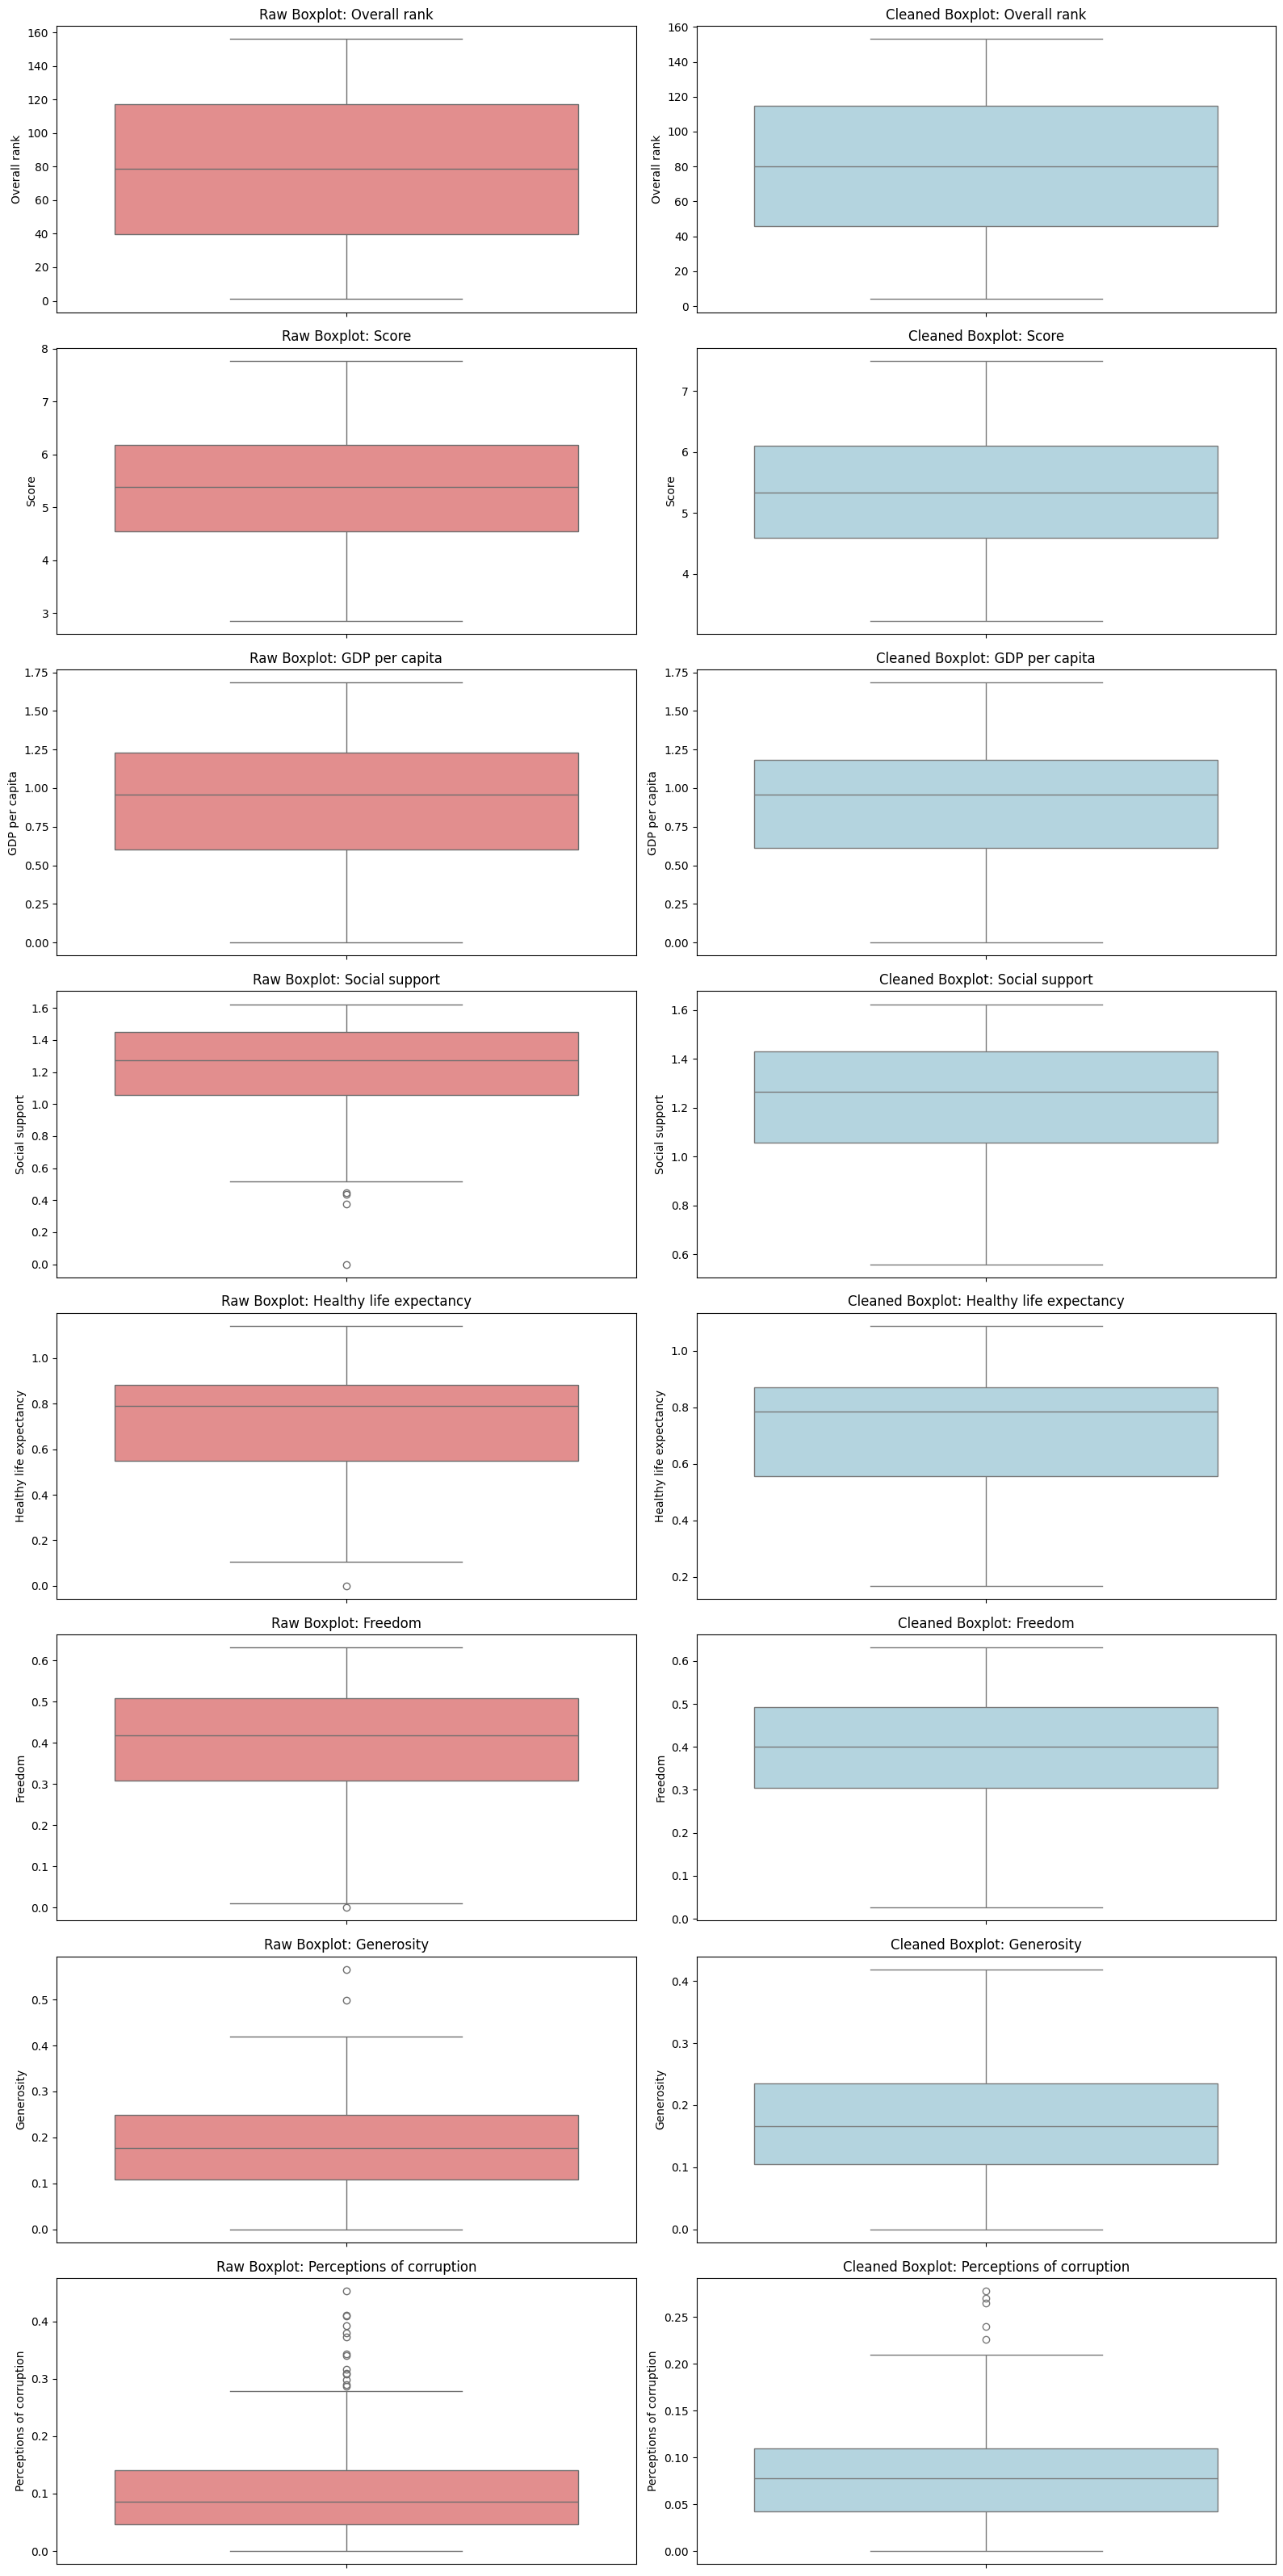

In [ ]:
# Outlier detection 2019

numerical_cols_2019 = raw_df_2019.select_dtypes(include=['float64', 'int64']).columns


# Make a copy for cleaning
cleaned_df_2019 = raw_df_2019.copy()

# Remove outliers column-by-column
for col in numerical_cols_2019:
    Q1 = cleaned_df_2019[col].quantile(0.25)
    Q3 = cleaned_df_2019[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    cleaned_df_2019 = cleaned_df_2019[(cleaned_df_2019[col] >= lower) & (cleaned_df_2019[col] <= upper)]

# Plot raw vs cleaned data side-by-side
fig, axes = plt.subplots(8, 2, figsize=(16, 32))  # 8 rows, 2 columns (1 for raw, 1 for cleaned)
axes = axes.flatten()

for i, col in enumerate(numerical_cols_2019):
    sns.boxplot(y=raw_df_2019[col], ax=axes[2*i], color='lightcoral')  # raw plot
    axes[2*i].set_title(f"Raw Boxplot: {col}")

    sns.boxplot(y=cleaned_df_2019[col], ax=axes[2*i + 1], color='lightblue')  # cleaned plot
    axes[2*i + 1].set_title(f"Cleaned Boxplot: {col}")

plt.tight_layout()
plt.show()

## Feature Scaling and Transformation

In [ ]:
#Standardization 2015
scaler = StandardScaler()
df_2015 = cleaned_df_2015[numerical_cols_2015]
df_2015_scaled = scaler.fit_transform(df_2015)

# Convert scaled numerical data back to a DataFrame
df_2015_scaled = pd.DataFrame(df_2015_scaled, columns=numerical_cols_2015, index=cleaned_df_2015.index)

#Here country and region features are removed from the feature set. Reason: they do not describe the happiness score directly and Including them could mislead the clustering because K-Means will try to "group" based on country names or regions, which is meaningless numerically
# View the scaled dataset
print(df_2015_scaled.head())

print("\nSummary statistics for scaled 2015 features:")
print(df_2015_scaled.describe().round(2))

   Overall rank     Score  Standard Error  GDP per capita  Social support  \
1     -1.784880  2.075454        0.379361        1.198118        1.616567   
3     -1.738248  2.038076       -0.543757        1.629410        1.322458   
4     -1.714933  1.947026       -0.844413        1.264100        1.288047   
6     -1.668301  1.900063       -1.537671        1.272771        1.112935   
9     -1.598353  1.809972       -0.357110        1.284167        1.232839   

   Healthy life expectancy   Freedom  Perceptions of corruption  Generosity  \
1                 1.363139  1.420703                   0.238158    1.839810   
3                 1.072496  1.697172                   2.759238    1.068836   
4                 1.167258  1.449052                   2.359392    2.028087   
6                 1.107904  1.332889                   2.230508    2.183387   
9                 1.287590  1.572369                   2.661588    1.833940   

   Dystopia Residual  
1           1.220013  
3           0.73

In [ ]:
#Standardization 2019
scaler = StandardScaler()
df_2019 = cleaned_df_2019[numerical_cols_2019]
df_2019_scaled = scaler.fit_transform(df_2019)

#  Convert scaled numerical data back to a DataFrame
df_2019_scaled = pd.DataFrame(df_2019_scaled, columns=numerical_cols_2019, index=cleaned_df_2019.index)

#Here country feature is removed from the feature set. Reason: It does not describe the happiness score directly and Including it could mislead the clustering because K-Means will try to "group" based on country names or regions, which is meaningless numerically


# View the scaled final dataset
df_2019_scaled.head()

print(df_2019_scaled.head())

print("\nSummary statistics for scaled 2019 features:")
print(df_2019_scaled.describe().round(2))

    Overall rank     Score  GDP per capita  Social support  \
3      -1.880291  2.276393        1.338611        1.633164   
9      -1.732476  2.012384        1.327737        1.030183   
11     -1.683204  1.928285        0.398035        0.892590   
12     -1.658568  1.898477        1.055895        0.949246   
14     -1.609296  1.807991        1.210845        1.285135   

    Healthy life expectancy   Freedom  Generosity  Perceptions of corruption  
3                  1.409044  1.585923    2.140265                   0.561196  
9                  1.362854  1.130422    0.855614                   2.461483  
11                 1.118046  1.331151   -0.312250                   0.121315  
12                 1.422901 -0.112555    1.054151                  -0.072233  
14                 1.270473  0.497353    2.070193                   3.376436  

Summary statistics for scaled 2019 features:
       Overall rank   Score  GDP per capita  Social support  \
count        133.00  133.00          133.00 

In [ ]:
#make features of the models same
common_features = ['Overall rank', 'Score', 'GDP per capita',
                   'Social support', 'Generosity', 'Perceptions of corruption', 'Freedom','Healthy life expectancy']

df_2015_scaled = df_2015_scaled[common_features]
df_2019_scaled = df_2019_scaled[common_features]



In [ ]:
df_2015_scaled.head()

,Overall rank,Score,Standard Error,GDP per capita,Social support,Healthy life expectancy,Freedom,Perceptions of corruption,Generosity,Dystopia Residual
1,-1.784880,2.075454,0.379361,1.198118,1.616567,1.363139,1.420703,0.238158,1.839810,1.220013
3,-1.738248,2.038076,-0.543757,1.629410,1.322458,1.072496,1.697172,2.759238,1.068836,0.738626
4,-1.714933,1.947026,-0.844413,1.264100,1.288047,1.167258,1.449052,2.359392,2.028087,0.711069
6,-1.668301,1.900063,-1.537671,1.272771,1.112935,1.107904,1.332889,2.230508,2.183387,0.739420
9,-1.598353,1.809972,-0.357110,1.284167,1.232839,1.287590,1.572369,2.661588,1.833940,0.334217


### K- Means Clustering model development

In [ ]:


#Define function to determine optimal number of clusters using the Elbow Method which will be used for both 2015 and 2019 datasets

def plot_elbow_method(X, max_clusters=20):


    inertia = []
    silhouette_scores = []
    calinski_scores = []
    davies_scores = []



    #loop through different values of k(number of clusters), starting from 2 up to max_clusters
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) #for each k value create and fit the K-Means model
        kmeans.fit(X)

        inertia.append(kmeans.inertia_)#Save inertia

        # Calculate silhouette score
        labels = kmeans.labels_
        silhouette_scores.append(silhouette_score(X, labels))

        # Calculate Calinski-Harabasz Index
        calinski_scores.append(calinski_harabasz_score(X, labels))

        # Calculate Davies-Bouldin Index
        davies_scores.append(davies_bouldin_score(X, labels))

    # Plot the Elbow Method
    #Plot all these metrics on a 2×2 grid
    plt.figure(figsize=(20, 10))

    plt.subplot(2, 2, 1)
    plt.plot(range(2, max_clusters + 1), inertia, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)

    plt.subplot(2, 2, 2)
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
    plt.title('Silhouette Score')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.grid(True)

    plt.subplot(2, 2, 3)
    plt.plot(range(2, max_clusters + 1), calinski_scores, marker='o')
    plt.title('Calinski-Harabasz Index (higher is better)')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Calinski-Harabasz Score')
    plt.grid(True)

    plt.subplot(2, 2, 4)
    plt.plot(range(2, max_clusters + 1), davies_scores, marker='o')
    plt.title('Davies-Bouldin Index (lower is better)')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Davies-Bouldin Score')
    plt.grid(True)

    plt.tight_layout()
    return inertia, silhouette_scores, calinski_scores, davies_scores #returns all four score lists



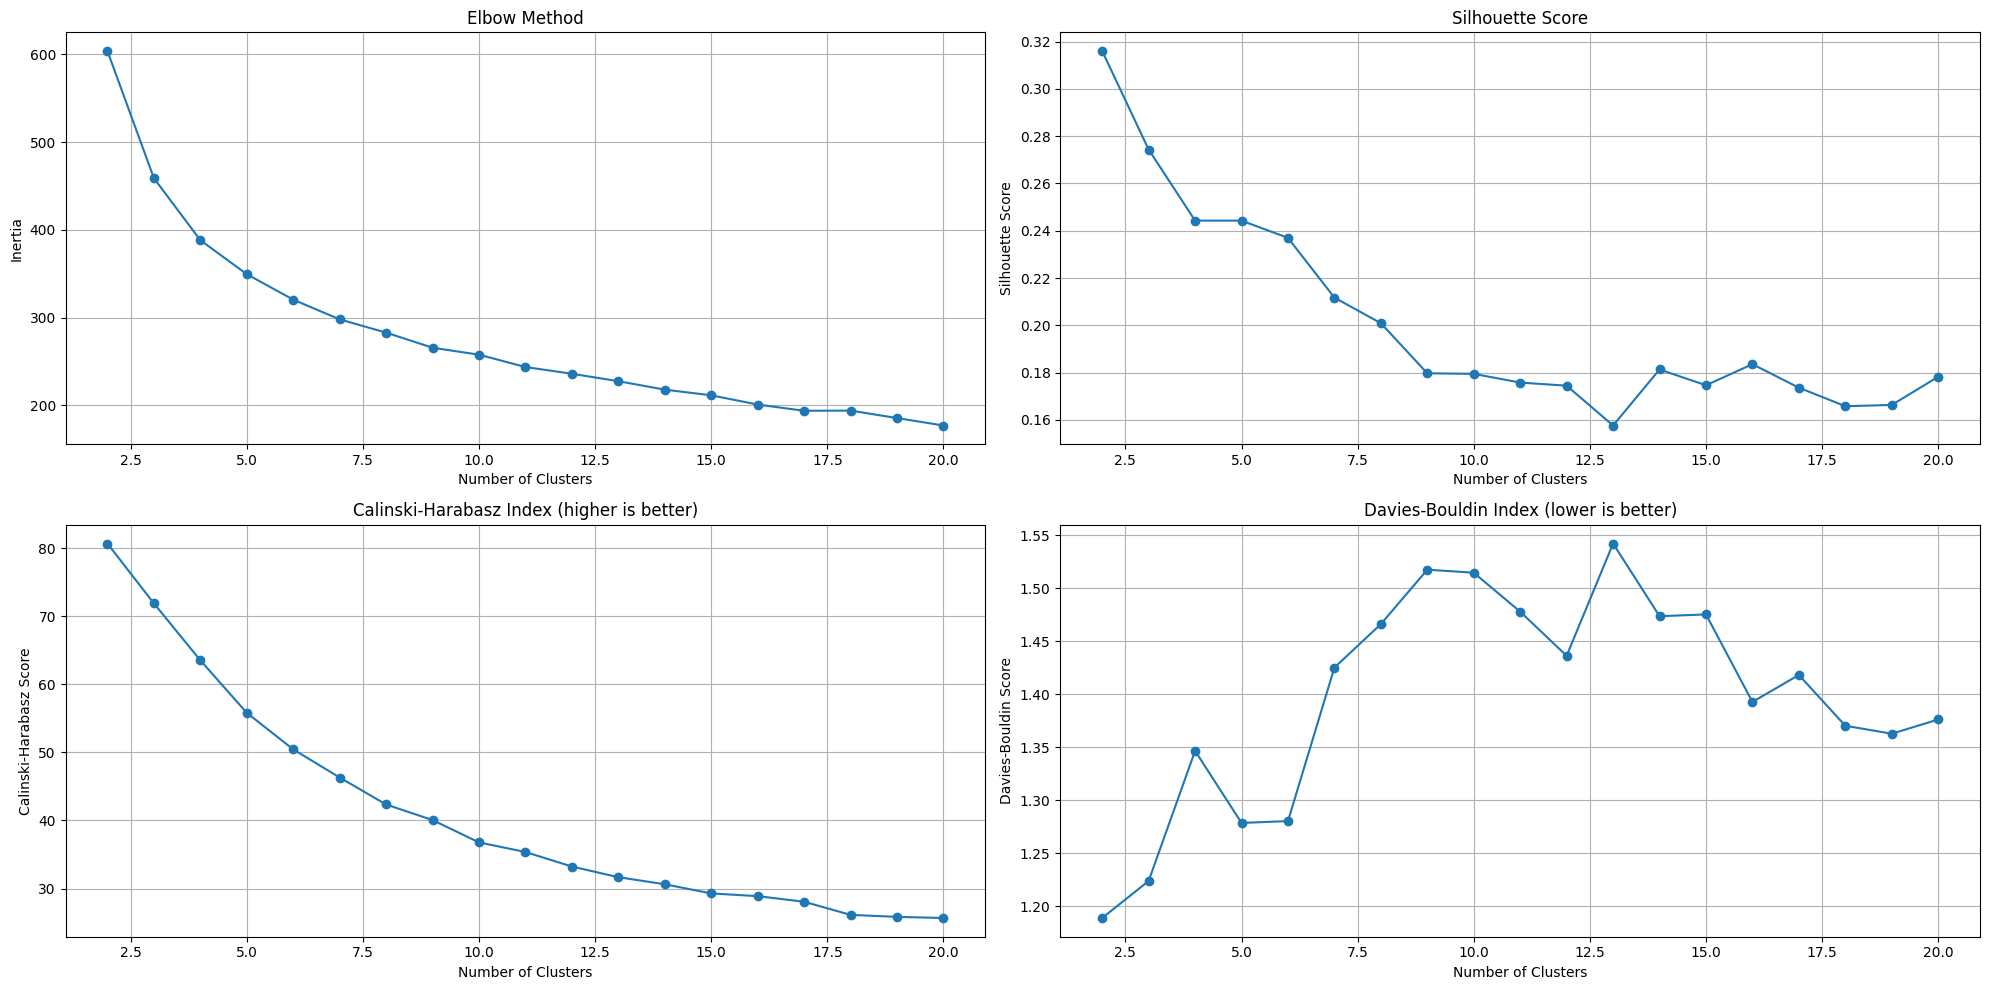

In [ ]:
#Determine optimal number of clusters for 2015 data

inertia_2015, silhouette_2015, calinski_2015, davies_2015 = plot_elbow_method(df_2015_scaled) # call plot_elbow_method function for 2015 data
plt.show()

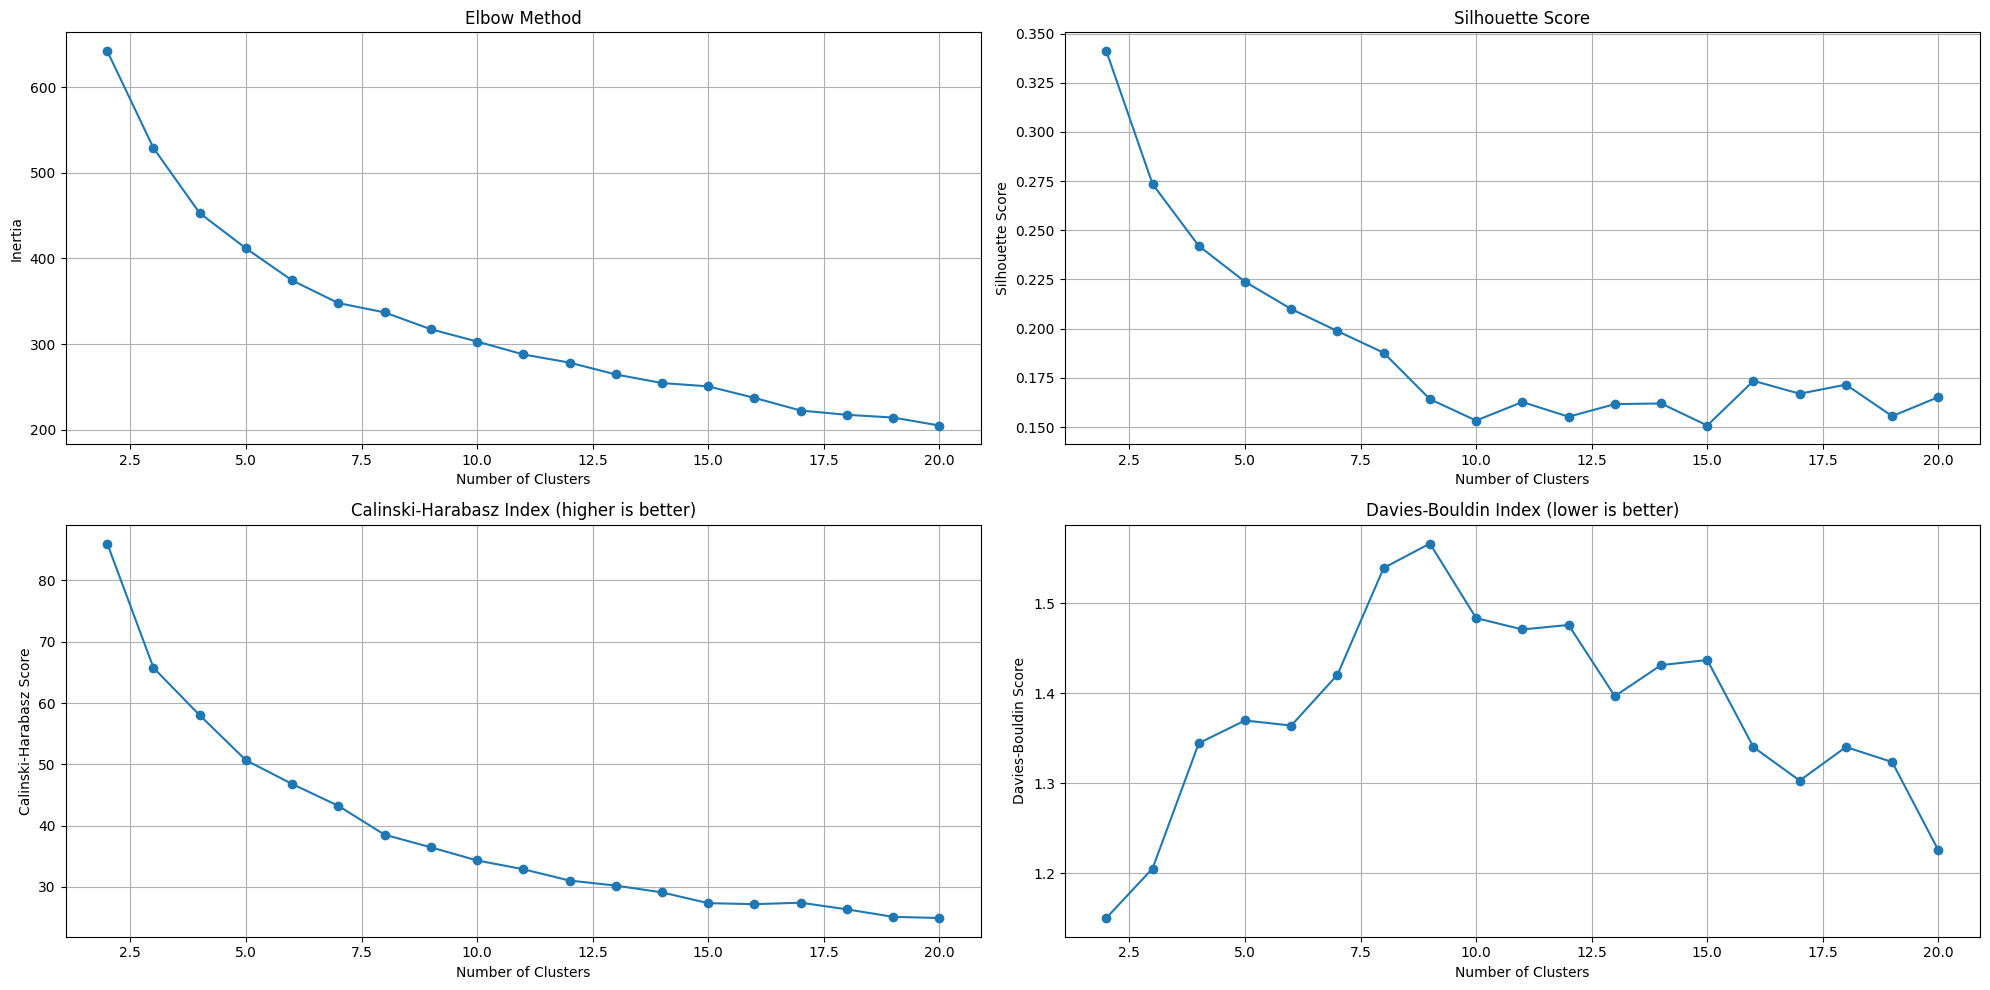

In [ ]:
#Determine optimal number of clusters for 2019 data

inertia_2019, silhouette_2019, calinski_2019, davies_2019 = plot_elbow_method(df_2019_scaled) # call plot_elbow_method function for 2019 data
plt.show()

In [ ]:
#Select optimal number of the clusters based on the the elbow mwthods
optimal_clusters_2015 = 3
optimal_clusters_2019 = 3




In [ ]:
#Apply K-Means clustering with the optimal number of clusters
kmeans_2015 = KMeans(n_clusters=optimal_clusters_2015, random_state=42, n_init=10)
kmeans_2019 = KMeans(n_clusters=optimal_clusters_2019, random_state=42, n_init=10)

# Fit the models and and predict cluster labels
cluster_labels_2015 = kmeans_2015.fit_predict(df_2015_scaled)
cluster_labels_2019 = kmeans_2019.fit_predict(df_2019_scaled)

# Add cluster labels to the original dataframes
cleaned_df_2015['Cluster'] = cluster_labels_2015
cleaned_df_2019['Cluster'] = cluster_labels_2019

# Get cluster centers
cluster_centers_2015 = kmeans_2015.cluster_centers_
cluster_centers_2019 = kmeans_2019.cluster_centers_


## Model Evaluation

In [ ]:
#Cluster evaluation 2015
print("\nClustering Evaluation for 2015 data:")
print(f"Inertia: {kmeans_2015.inertia_:.2f}")
print(f"Silhouette Score: {silhouette_score(df_2015_scaled, cluster_labels_2015):.4f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_score(df_2015_scaled, cluster_labels_2015):.2f}")
print(f"Davies-Bouldin Index: {davies_bouldin_score(df_2015_scaled, cluster_labels_2015):.4f}")




Clustering Evaluation for 2015 data:
Inertia: 458.99
Silhouette Score: 0.2744
Calinski-Harabasz Index: 71.90
Davies-Bouldin Index: 1.2237


In [ ]:
#Cluster evaluation 2019
print("\nClustering Evaluation for 2019 data:")
print(f"Inertia: {kmeans_2019.inertia_:.2f}")
print(f"Silhouette Score: {silhouette_score(df_2019_scaled, cluster_labels_2019):.4f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_score(df_2019_scaled, cluster_labels_2019):.2f}")
print(f"Davies-Bouldin Index: {davies_bouldin_score(df_2019_scaled, cluster_labels_2019):.4f}")


Clustering Evaluation for 2019 data:
Inertia: 528.98
Silhouette Score: 0.2735
Calinski-Harabasz Index: 65.74
Davies-Bouldin Index: 1.2050


## Model Drift Anaysis

Centroid shifts between 2015 and 2019


In [ ]:
#centroid shifts between 2015 and 2019

# Calculate Euclidean distance between centroids
def calculate_centroid_distance(centroid1, centroid2):
    return np.sqrt(np.sum((centroid1 - centroid2) ** 2))


#calculate centroid shifts
cluster_matches = {} #Stores the best cluster centroid of 2019 that matches with 2015 cluster centroids and distance
used_2019 = set()

for i in range(len(cluster_centers_2015)):
    min_dist = float('inf')
    best_match = -1

    for j in range(len(cluster_centers_2019)):# look for centroid of the closest 2019 cluster
        if j not in used_2019:
            dist = calculate_centroid_distance(cluster_centers_2015[i], cluster_centers_2019[j])
            if dist < min_dist:
                min_dist = dist
                best_match = j

    cluster_matches[i] = (best_match, min_dist)
    used_2019.add(best_match)

print("\nCluster matching between 2015 and 2019:")
for cluster_2015, (cluster_2019, distance) in cluster_matches.items():
    print(f"2015 Cluster {cluster_2015} -> 2019 Cluster {cluster_2019} (Distance: {distance:.4f})")






Cluster matching between 2015 and 2019:
2015 Cluster 0 -> 2019 Cluster 2 (Distance: 0.4415)
2015 Cluster 1 -> 2019 Cluster 1 (Distance: 0.5540)
2015 Cluster 2 -> 2019 Cluster 0 (Distance: 0.2837)


In [ ]:
#Calculate Kullback-Leibler (KL) Divergence for clusters
#KL Divergence gives a quantitative summary of cluster population drift

#calculates the Kullback-Leibler (KL) Divergence between two probability distributions p and q. It measures how much one distribution diverges from another
def calculate_kl_divergence(p, q): #function  to Calculate KL Divergence
    p = np.array(p)#convert to numpy array
    q = np.array(q)
    # Add small constant to avoid division by zero
    p = p + 1e-10
    q = q + 1e-10
    # Normalize to ensure they sum to 1
    p = p / np.sum(p)
    q = q / np.sum(q)
    return entropy(p, q)

# Calculate  normalized cluster distribution for both years 2015 and 2019
cluster_dist_2015 = cleaned_df_2015['Cluster'].value_counts(normalize=True).sort_index() #gives proportions, not raw counts and ensures the cluster order
cluster_dist_2019 = cleaned_df_2019['Cluster'].value_counts(normalize=True).sort_index()

# Maps the cluster distributions from 2019 to the matched 2015 clusters using the cluster_matches
mapped_dist_2019 = [0] * optimal_clusters_2015#initialse the list with 0s to later store rearranged cluster distributions for 2019
for cluster_2015, (cluster_2019, _) in cluster_matches.items():
    if cluster_2019 < len(cluster_dist_2019):
        mapped_dist_2019[cluster_2015] = cluster_dist_2019[cluster_2019]

# Calculate the divergence between the 2015 and 2019 cluster distributions
kl_divergence = calculate_kl_divergence(cluster_dist_2015, mapped_dist_2019)
print(f"\nKL Divergence between 2015 and 2019 cluster distributions: {kl_divergence:.4f}")




KL Divergence between 2015 and 2019 cluster distributions: 0.0259


In [ ]:
#Calculate and Analyze cluster membership changes

# Create a common set of countries between the 2015 and 2019 datasets
common_countries = set(cleaned_df_2015['Country']).intersection(
    set(cleaned_df_2019['Country']))

#the count of thecommon countries between the 2015 and 2019 datasets
print(f"\nNumber of common countries between 2015 and 2019: {len(common_countries)}")

# A dataframe to track the cluster changes for each country.
cluster_changes = pd.DataFrame({
    'Country': list(common_countries)
})


#For each common country, get the assigned cluster in both 2015 and 2019.
for country in common_countries:
    cluster_2015 = cleaned_df_2015[cleaned_df_2015['Country'] == country]['Cluster'].values[0]
    cluster_2019 = cleaned_df_2019[cleaned_df_2019['Country'] == country]['Cluster'].values[0]

    #Remap the 2019 cluster to the corresponding 2015 cluster for consistency
    mapped_cluster_2019 = None
    for c2015, (c2019, _) in cluster_matches.items():
        if c2019 == cluster_2019:
            mapped_cluster_2019 = c2015
            break

    cluster_changes.loc[cluster_changes['Country'] == country, 'Cluster_2015'] = cluster_2015
    cluster_changes.loc[cluster_changes['Country'] == country, 'Cluster_2019'] = mapped_cluster_2019

# Calculate percentage of countries that changed clusters
cluster_changes['Changed'] = cluster_changes['Cluster_2015'] != cluster_changes['Cluster_2019'] #compare clusters
pct_changed = cluster_changes['Changed'].mean() * 100 #calculate the changed cluster presentage

print(f"Percentage of countries that changed clusters: {pct_changed:.2f}%")





Number of common countries between 2015 and 2019: 112
Percentage of countries that changed clusters: 11.61%


## Visualization with PCA

Apply PCA for dimensionality reduction

In [ ]:
#Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_2015 = pca.fit_transform(df_2015_scaled)
pca_2019 = pca.fit_transform(df_2019_scaled)

#Create DataFrames with PCA results
pca_df_2015 = pd.DataFrame(data=pca_2015, columns=['PC1', 'PC2'])
pca_df_2015['Cluster'] = cluster_labels_2015
pca_df_2015['Country'] = cleaned_df_2015['Country'].values

pca_df_2019 = pd.DataFrame(data=pca_2019, columns=['PC1', 'PC2'])
pca_df_2019['Cluster'] = cluster_labels_2019
pca_df_2019['Country'] = cleaned_df_2019['Country'].values


Visualize clustering results with PCA

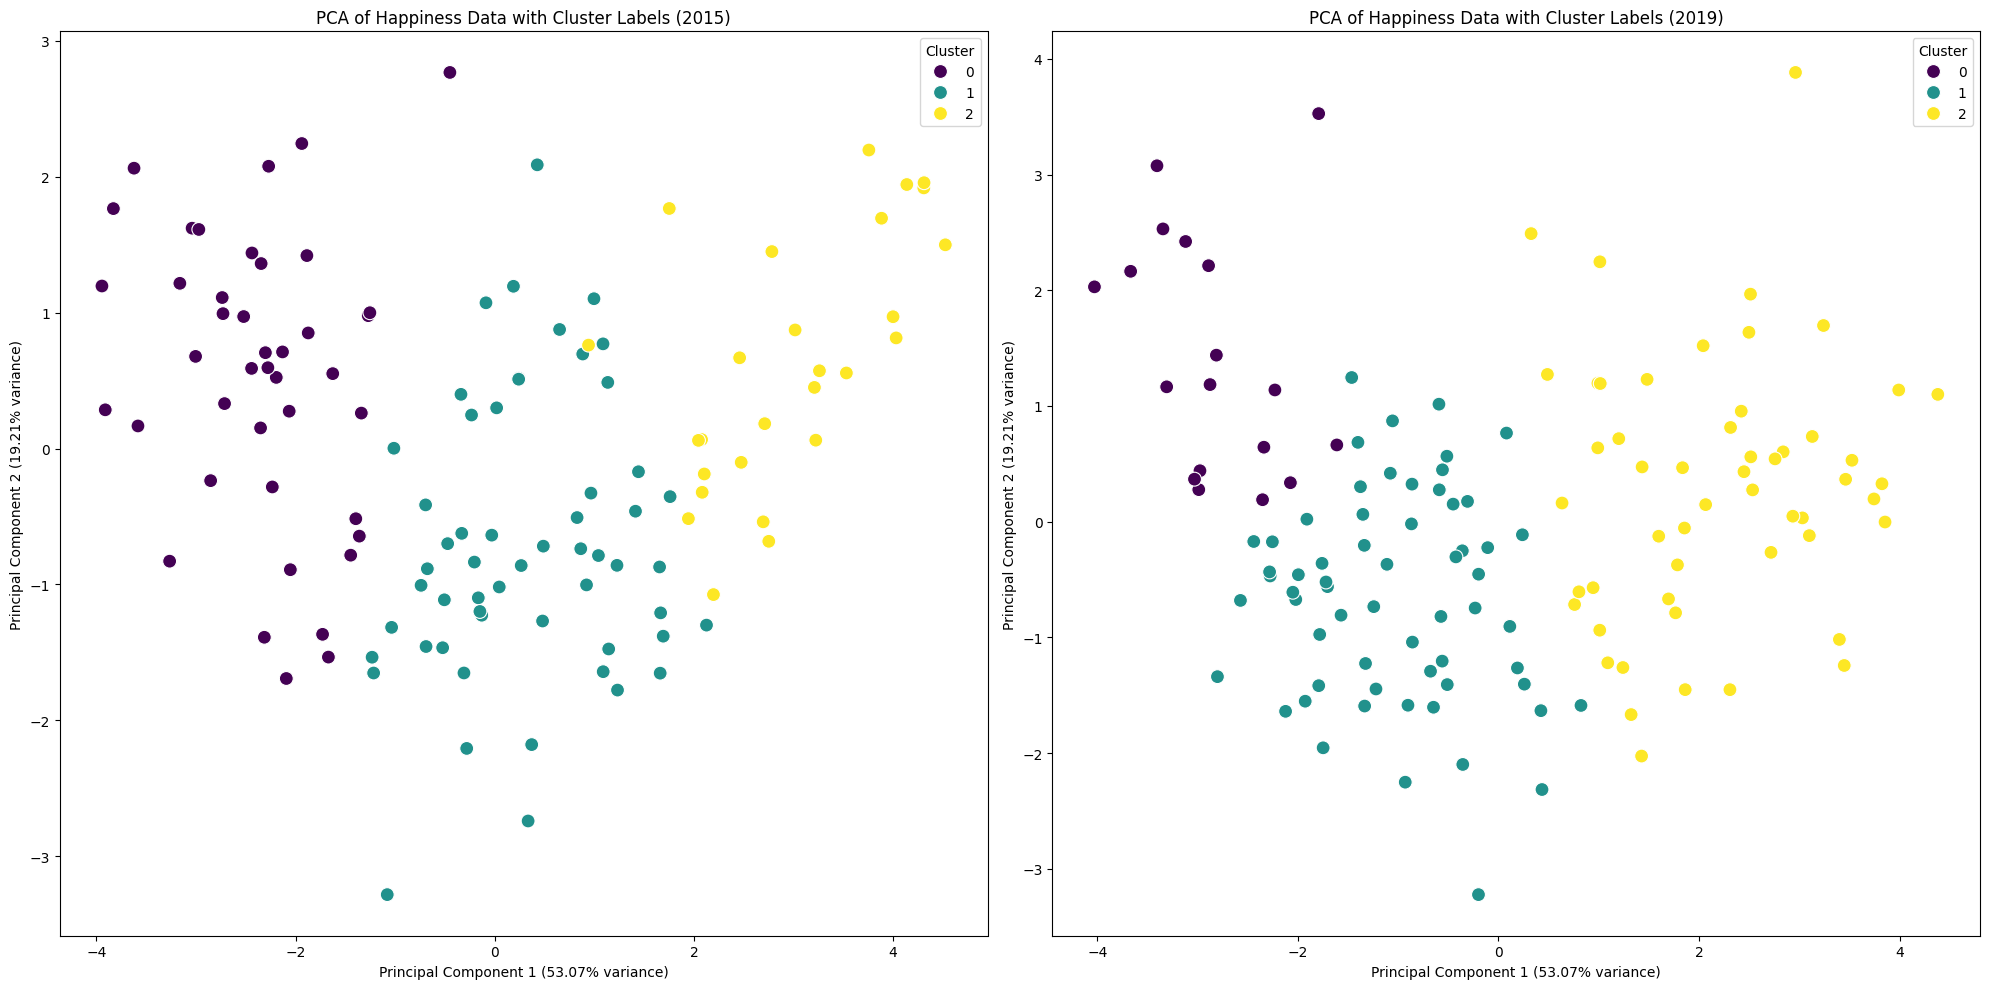

In [ ]:
#Visualize clustering results with PCA
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df_2015, palette='viridis', s=100)
plt.title('PCA of Happiness Data with Cluster Labels (2015)')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)')

plt.subplot(1, 2, 2)
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df_2019, palette='viridis', s=100)
plt.title('PCA of Happiness Data with Cluster Labels (2019)')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)')


plt.tight_layout()
plt.show()



Visualize cluster changes over time using PCA


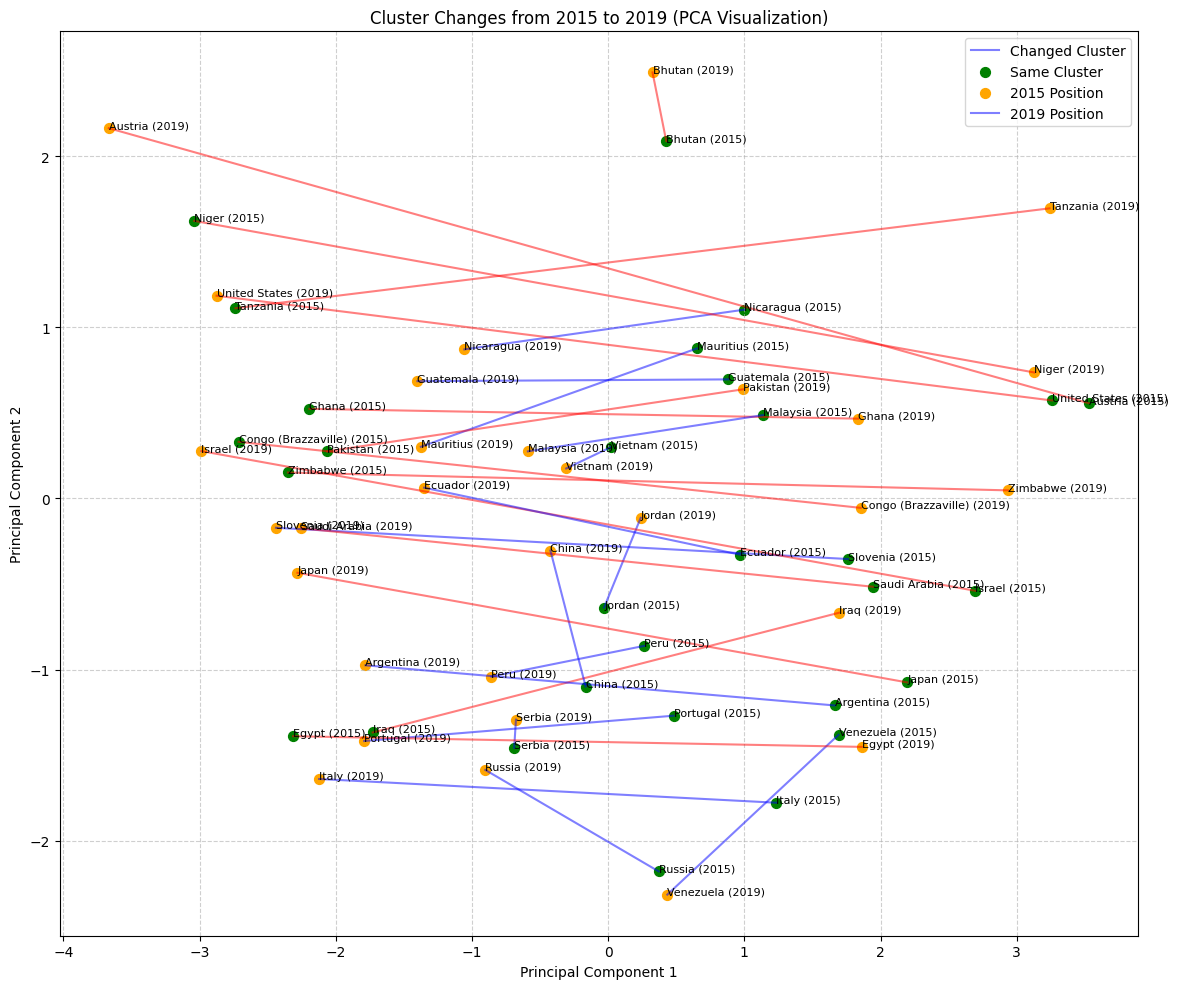

In [ ]:
# For countries common to both datasets
common_countries = list(set(pca_df_2015['Country']).intersection(set(pca_df_2019['Country'])))

# Create a combined dataframe for plotting
pca_combined = pd.DataFrame()

for country in common_countries: # loop through each common country
    # 2015 data
    row_2015 = pca_df_2015[pca_df_2015['Country'] == country] #Finds the row of the current country in pca_df_2015
    x1, y1 = row_2015['PC1'].values[0], row_2015['PC2'].values[0] # find x and y values for PCA plot
    cluster_2015 = row_2015['Cluster'].values[0] # find the cluster label

    # 2019 data
    row_2019 = pca_df_2019[pca_df_2019['Country'] == country]
    x2, y2 = row_2019['PC1'].values[0], row_2019['PC2'].values[0]
    cluster_2019 = row_2019['Cluster'].values[0]

    # store them in combined dataframe
    pca_combined = pd.concat([pca_combined, pd.DataFrame({
        'Country': [country],
        'PC1_2015': [x1],
        'PC2_2015': [y1],
        'PC1_2019': [x2],
        'PC2_2019': [y2],
        'Cluster_2015': [cluster_2015],
        'Cluster_2019': [cluster_2019],
        'Changed_Cluster': [cluster_2015 != cluster_2019] #if the cluster changed
    })])

# Sample some countries to avoid overcrowding the plot
sampled_countries = pca_combined.sample(min(30, len(pca_combined)))

plt.figure(figsize=(12, 10))
for idx, row in sampled_countries.iterrows():
    plt.plot([row['PC1_2015'], row['PC1_2019']], [row['PC2_2015'], row['PC2_2019']],
             'r-' if row['Changed_Cluster'] else 'b-', alpha=0.5) #redline - country changed its cluster, # blus line country the cluster remained same
    plt.scatter(row['PC1_2015'], row['PC2_2015'], c='green', s=50) #position in 2015
    plt.scatter(row['PC1_2019'], row['PC2_2019'], c='orange', s=50) #position in 2019
    plt.text(row['PC1_2015'], row['PC2_2015'], f"{row['Country']} (2015)", fontsize=8) #country and year labels
    plt.text(row['PC1_2019'], row['PC2_2019'], f"{row['Country']} (2019)", fontsize=8)

plt.title('Cluster Changes from 2015 to 2019 (PCA Visualization)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(['Changed Cluster', 'Same Cluster', '2015 Position', '2019 Position'])

plt.tight_layout()
plt.savefig('cluster_changes_pca.png')
plt.show()

